<a href="https://colab.research.google.com/github/ThuanPhong0126/Deeplearning/blob/master/protonx_dog_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/Colab Notebooks/protonx

/content/drive/My Drive/Colab Notebooks/protonx


In [0]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O ./cats_and_dogs_filtered.zip

--2020-05-01 14:39:51--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M  55.6MB/s    in 1.2s    

2020-05-01 14:39:53 (55.6 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
main_folder = './'
!unzip -q cats_and_dogs_filtered.zip -d $main_folder

In [0]:
cd cats_and_dogs_filtered

/content/drive/My Drive/Colab Notebooks/protonx/cats_and_dogs_filtered


In [0]:
train_folder = './train'

In [0]:
valid_folder = './validation'

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_generator =ImageDataGenerator(rescale=1/255)

In [0]:
vail_generator=ImageDataGenerator(rescale=1/255)

In [0]:
generated_train_data=train_generator.flow_from_directory(
    train_folder,
    target_size=(150,150),
    batch_size=128,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [0]:
generated_train_data

In [0]:
generated_valid_data=vail_generator.flow_from_directory(
    valid_folder,
    target_size=(150,150),
    batch_size=128,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [0]:
model=Sequential()

In [0]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))

In [0]:
model.add(MaxPooling2D(2,2))

In [0]:
model.add(Conv2D(32,(3,3),activation='relu'))

In [0]:
model.add(MaxPooling2D(2,2))

In [0]:
model.add(Conv2D(64,(3,3),activation='relu'))

In [0]:
model.add(MaxPooling2D(2,2))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(512,activation='relu'))

In [0]:
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)            

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['acc'])

In [0]:
import tensorflow as tf

DESIRED_ACCURACY = 0.7

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>DESIRED_ACCURACY):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
history = model.fit_generator(
    generated_train_data,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=generated_valid_data,
    validation_steps=8,
    callbacks=[callbacks]
)

Epoch 1/15
8/8 [==============================] - 35s 4s/step - loss: 0.6903 - acc: 0.5348 - val_loss: 0.6749 - val_acc: 0.6260
Epoch 2/15
8/8 [==============================] - 37s 5s/step - loss: 0.6842 - acc: 0.5361 - val_loss: 0.6654 - val_acc: 0.6470
Epoch 3/15
8/8 [==============================] - 35s 4s/step - loss: 0.6812 - acc: 0.5861 - val_loss: 0.6635 - val_acc: 0.6250
Epoch 4/15
8/8 [==============================] - 36s 5s/step - loss: 0.6648 - acc: 0.5684 - val_loss: 0.6633 - val_acc: 0.6440
Epoch 5/15
8/8 [==============================] - 35s 4s/step - loss: 0.6752 - acc: 0.6332 - val_loss: 0.7079 - val_acc: 0.4950
Epoch 6/15
8/8 [==============================] - 36s 5s/step - loss: 0.6661 - acc: 0.6289 - val_loss: 0.6407 - val_acc: 0.6850
Epoch 7/15
8/8 [==============================] - 35s 4s/step - loss: 0.6319 - acc: 0.6383 - val_loss: 0.6187 - val_acc: 0.6660
Epoch 8/15
8/8 [==============================] - 36s 5s/step - loss: 0.6242 - acc: 0.6514 - val_loss: 0

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [0]:
uploaded=files.upload()
for fn in uploaded.keys():
  path='./'+fn
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)/255
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  if classes[0]>0.5:
    print(fn+' is a dog')
  else:
    print(fn+' is a cat')

Saving tải xuống.jpg to tải xuống (2).jpg
tải xuống.jpg is a dog


Text(0.5, 1.0, 'Training and validation loss')

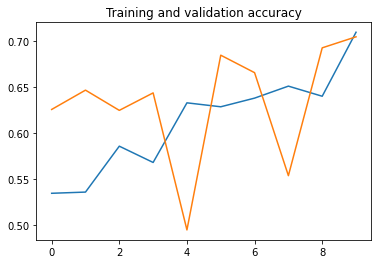

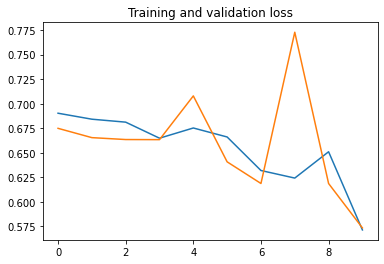

In [0]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )